Привет, Владимир!

Меня зовут Вячеслав Погорелый, и я буду проводить ревью твоего проекта. 

Предлагаю перейти на "ты", если не против)

Но если это не удобно - дай знать, и мы перейдем на "вы". Моя главная задача — не находить сделанные тобою ошибки, а передать свой опыт и помочь тебе стать аналитиком данных.

Я отметил комментарии и замечания разным цветом далее по тексту markdown:

---    
<div class="alert alert-block alert-danger">
    
### Ошибка
    
Критическое замечание, которые следует исправить.
</div> 
    
---
    
<div class="alert alert-block alert-warning">
    
### Совет
    
Замечание\совет на будущее.
</div>
    
---
    
<div class="alert alert-block alert-success">
    
### Успех
    
Когда всё сделано правильно.
</div>
    
    
    
Будет здорово, если для ответов ты выберешь любой **<font color="maroon">читабельный и заметный цвет</font>**, так мне будет проще все проверить.


При доработке проекта попрошу тебя сохранить и не видоизменять заметки ревьюера, это осложняет повторную проверку.

<div class="alert alert-block alert-success">
 
# Итоговый Комментарий ревьюера ver.2
    
#### Успех
    
Спасибо тебе большое за такую качественную и отличную работу. У тебя прекрасно получилось справиться и продемонстрировать оригинальный подход. От себя я желаю тебе успехов в дальнешей учебе. Ты точно справишься, я уверен:)
</div 

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats as st

Нашёл в интернете, что можно расширить окно вывода графиков, вставив в тетрадь такой код:

In [2]:
%%javascript
IPython.OutputArea.auto_scroll_threshold = 9999;

<IPython.core.display.Javascript object>

# Сборный проект 1
### Определение закономерностей, способных указать на успешность игры на рынке
Сейчас декабрь 2016 года, и мы приступаем к анализу данных о продажах на рынке компьютерных игр за период от начала 80-х годов до нынешних дней. Цель проекта - выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании на 2017 год. Важно помнить о том, что данные за 2016 год могут быть не полными, а какие-то данные, например, об устаревших игровых платформах, не релевантными. Данные о продажах разбиты на регионы; также мы располагаем данными об оценках игр критиками и рядовыми пользователями.
### Часть 1. Изучение данных и предобработка
Откроем датасет и изучим общую информацию о данных.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Спасибо большое за оформление оглавление проекта. 
</div 

In [3]:
data_raw = pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

Посмотрим на первые строки датасета.

In [4]:
data_raw.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Уже можно заметить, что в датасете есть не все данные: видны NaN в колонках с оценками и возрастным рейтингом. Видно, что колонка `Year_of_Release` - это вещественное число, а не целое, это странно. Продолжим анализ:

In [5]:
data_raw.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Первичная информация о проекте получена. 
</div 

Всё так: пропуски, некорректный регистр названия столбцов и неподходящий для анализа формат данных в некоторых столбцах.

Первым делом приведём названия столбцов к змеиному регистру. Оставим старые данные в переменной `data_raw`, возможно позже они нам пригодятся. Обработанный датафрейм сохраним в `data`.

In [6]:
data = data_raw

# Переименование столбцов
data = data.rename(columns = 
                   {'Name' : 'name',
                   'Platform' : 'platform',
                   'Year_of_Release' : 'year_of_release',
                   'Genre' : 'genre',
                   'NA_sales' : 'na_sales',
                   'EU_sales' : 'eu_sales',
                   'JP_sales' : 'jp_sales',
                   'Other_sales' : 'other_sales',
                   'Critic_Score' : 'critic_score',
                   'User_Score' : 'user_score',
                   'Rating' : 'rating'}
                    )

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
А еще можно вот таким образом привести к нижнему регистру df.columns = df.columns.str.lower()
</div>

<div class="alert alert-block alert-info">
    
<h3> Комментарий студента <a class="tocSkip"></h3> 
    
Привет, Вячеслав! В предыдущих проектах комментарий студента выделялся таким синим блоком, мне было бы удобно так и продолжить.
Спасибо за ревью и позитивный фидбек! И за совет.
    
</div>

Приведём типы данных в некоторых столбцах в более удобный для анализа вид. Начнём с года выпуска игры. Очевидно, что это целое число. Так как пропуски данных NaN перевести в целое невозможно, вероятно, стоит их просто удалить, так как отсутствие данных о годе выпуска может сделать невозможным анализ игр на оси времени.

Однако если пропусков слишком много, это может негативно повлиять на анализ, так что сначала изучим долю пустых `year_of_release`:

In [7]:
print(f'В колонке "год выпуска" {data["year_of_release"].isna().sum()} пропусков, то есть всего лишь')
print(f'{data["year_of_release"].isna().sum() / len(data):.2%} от общего числа строк')

В колонке "год выпуска" 269 пропусков, то есть всего лишь
1.61% от общего числа строк


Примерно полтора процента датасета. Удалим такие строки:

In [8]:
data = data[~ (data['year_of_release'].isna())]

# Проверим, сильно ли изменился датасет
print(len(data))

16446


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Логично. Данных мало и проще от низ избавиться.
</div 

Датасет сократился на ожидаемое количество строк, ничего лишнего удалено не было. Теперь можно изменить тип данных в годе выпуска игры.

In [9]:
data['year_of_release'] = data['year_of_release'].astype('int')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для экономии вычислительной памяти лучше всего перевести в int32
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента <a class="tocSkip"></h3> 
    
Спасибо! Честно говоря, я еще плохо знаком со структурой памяти, так что буду гуглить: _Int32 является неизменяемым типом значения, представляющим целые числа со знаком в диапазоне от отрицательного 2 147 483 648 до положительного 2 147 483 647_.
 Что ж, такого диапазона нам хватит :)
    
</div>

Колонка `user_score` строковая, хотя для анализа критично важно, чтобы она была вещественной. Присмотримся к ней внимательнее:

In [10]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Помимо пустых строк, которые не будут мешать переводу колонки в вещественный вид, в данных есть строка "tbd". Это расшифровывается как "to be declared", то есть информации на данный момент нет. Может ли это значение присваиваться не случайным данным, а зависеть от чего-то? Моё предположение: она возникает только в новых играх, данные о которых просто ещё не успели заполнить. Проверим:

In [11]:
data[data['user_score'] == 'tbd'].describe()

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score
count,2376.000000,2376.000000,2376.000000,2376.000000,2376.000000,1056.000000
mean,2007.450337,0.125539,0.043674,0.002782,0.015905,60.766098
std,3.484229,0.176593,0.112068,0.026395,0.039411,11.190603
min,1997.000000,0.000000,0.000000,0.000000,0.000000,23.000000
25%,2005.000000,0.030000,0.000000,0.000000,0.000000,54.000000
50%,2008.000000,0.070000,0.010000,0.000000,0.010000,62.000000
75%,2010.000000,0.150000,0.040000,0.000000,0.020000,69.000000
max,2016.000000,3.450000,2.590000,0.860000,1.090000,90.000000


Моё предположение оказалось не верным: годы игр варьируются от 1997 до 2016. В таком случае опустошим эти ячейки: приведём их к значению NaN, а затем изменим тип даных в столбце на вещественный.

In [12]:
data['user_score'] = data['user_score'].replace('tbd', np.NaN)
data['user_score'] = data['user_score'].astype('float')

Еще раз взглянем на типы данных:

In [13]:
data.dtypes

name                object
platform            object
year_of_release      int32
genre               object
na_sales           float64
eu_sales           float64
jp_sales           float64
other_sales        float64
critic_score       float64
user_score         float64
rating              object
dtype: object

Всё в порядлке. Перейдём к работе с пропусками:

In [14]:
data.isna().sum()

name                  2
platform              0
year_of_release       0
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8463
user_score         8983
rating             6678
dtype: int64

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для визуализации пропусков можешь использовать вот такую библиотеку https://russianblogs.com/article/5001266235/
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента <a class="tocSkip"></h3> 
    
Ничего себе! Это очень круто, спасибо.
    
</div>

От пустых данных в названии и жанре игр просто избавимся, это всего две строки датасета.

In [15]:
data = data[(~data['name'].isna()) & (~data['genre'].isna())]

Удалять пропуски в оценках критиков/пользователей и возрастном рейтинге игр опасно: будет потеряно слишком много данных. Можно ли попробовать заполнить их подходящими значениями? Например, оценки могли бы быть заполнены средним или медианным значением по региону/платформе.

Мой ответ: __нет__. Нет никаких данных о том, что игры оцениваются схожим образом в каком-то определённом регионе или в зависимости от жанра игры. Не исключено, что оценка от критиков и геймеров может зависеть от этих факторов, но в первую оцередь на неё влияют особенности геймплея каждой отдельной игры.

Решение: оставить пропуски в оценках не тронутыми.

Проверим, сильно ли изменился наш датасет после удаления пропущенных данных:

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все верно. Тут не подберешь какую-то логичную замену. 
</div 

In [16]:
# Сравним размеры изначальных и предобработанных данных
print(f'Датасет уменьшился всего на {1 - data.shape[0] / data_raw.shape[0]:.2%}')

Датасет уменьшился всего на 1.62%


Что делать с возрастным рейтингом? Заполним пропуски в этом столбце заглушкой "нет данных".

In [17]:
data['rating'] = data['rating'].fillna('no_info')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Значение-заглушка - это хорошее решение. 
</div 

Добавим столбец "общие продажи", включающий в себя количество проданных копий во всех регионах мира.

И сразу посмотрим на продажи в разрезе платформ/регионов и жанров/регионов.
Сохраним эти сводные таблицы в переменных `sales_platforms` и `sales_genres` соответственно. Уверен, что позже они нам пригодятся.

In [18]:
data['worldwide_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

# Сведём данные по регионам и жанрам
sales_platforms = data.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'worldwide_sales'], aggfunc = 'sum')
sales_genres = data.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'worldwide_sales'], aggfunc = 'sum')

# Посмотрим на продажи по платформам и жанрам, отсортировав по убыванию общих продаж
display(sales_platforms.sort_values(by = 'worldwide_sales', ascending = False))
display(sales_genres.sort_values(by = 'worldwide_sales', ascending = False))

,eu_sales,jp_sales,na_sales,other_sales,worldwide_sales
platform,,,,,
PS2,332.63,137.54,572.92,190.47,1233.56
X360,268.32,12.30,595.74,84.88,961.24
PS3,327.21,79.41,390.13,134.59,931.34
Wii,258.32,68.28,486.87,77.71,891.18
DS,188.41,175.02,380.31,59.04,802.78
PS,212.39,139.78,334.72,40.69,727.58
PS4,141.09,15.96,108.74,48.35,314.14
GBA,74.59,46.56,184.12,7.61,312.88
PSP,65.62,75.88,107.27,40.76,289.53


,eu_sales,jp_sales,na_sales,other_sales,worldwide_sales
genre,,,,,
Action,510.99,160.14,863.17,182.22,1716.52
Sports,371.33,134.93,671.20,132.21,1309.67
Shooter,314.52,38.68,584.83,103.33,1041.36
Role-Playing,188.24,353.39,330.04,59.41,931.08
Platform,199.39,130.71,444.44,51.01,825.55
Misc,210.60,107.02,399.57,73.10,790.29
Racing,234.49,56.63,356.86,75.51,723.49
Fighting,99.00,87.28,220.51,35.87,442.66
Simulation,113.35,63.64,180.40,30.57,387.96


Уже можно сделать первые выводы о популярности некоторых жанров и игровых платформ. Перейдём к исследовательскому анализу данных.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Хорошо получилось справиться с предобработкой. Здорово. 
</div 

### Часть 2. Исследовательский анализ данных.
Посмотрим, сколько игр выпускалось в разные годы. Возможно, для планирования 2017-го года пригодятся не все.
<a id='1'></a>

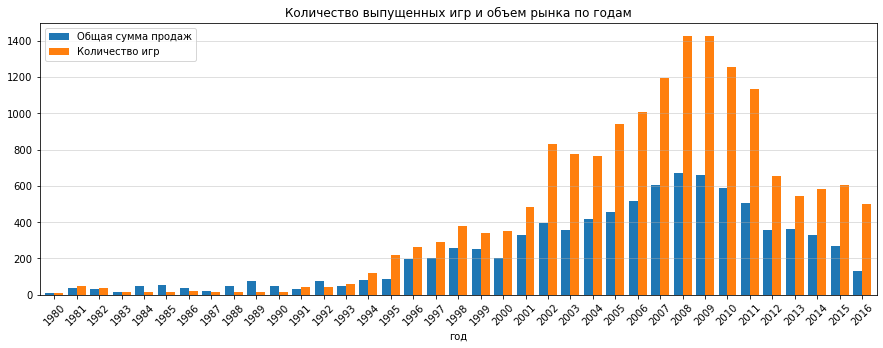

In [19]:
# Создадим две сводные таблицы: количество выпущенных игр по годам и количество проданных копий по годам
sales_per_year = data.pivot_table(index = 'year_of_release', values = 'worldwide_sales', aggfunc = 'sum')
games_per_year = data.pivot_table(index = 'year_of_release', values = 'name', aggfunc = 'count')

# Сведем обе таблицы в одну, используя индекс "год выпуска". Сохраним новую таблицу в "games_and_sales_per_year"
games_and_sales_per_year = sales_per_year.join(games_per_year)

# Посмотрим на распредлеление по годам
games_and_sales_per_year.plot(kind = 'bar', figsize = (15, 5), xlabel = 'год', legend = True, width = .8)
plt.title('Количество выпущенных игр и объем рынка по годам')
plt.legend(['Общая сумма продаж', 'Количество игр'], loc = 2)
plt.xticks(rotation=45)
plt.grid(alpha = .5, axis = 'y')
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Очень классный метод визуализации. По такому графику мы видим, как выпускались игры за  каждый год. 
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента <a class="tocSkip"></h3> 
    
Приятно, когда особо выделяют какие-то отдельные решения :)
    
</div>

<a id='2'></a>
Рынок компьютьерных игр стабиольно рос впоть до 2009 года, затем произошло некоторое падение, а в 2012 году случился настоящий перелом: количество выпускаемых игр обрушилось более чем в два раза, а количество проданных копий - на треть по сравнению с пиковым 2009 годом.

Мне не удалось найти информации о тектонических сдвигах в индустрии в этом году. Однако цифры показывают: основывать принятие решений на данных до 2012 не имеет смысла: рынок изменился.

При дальнейшем анализе будем брать 2012 и более поздние годы. Обновим ранее созданные сводные `sales_platforms` и `sales_genres` в соответствии с обнаруженной информацией.

In [20]:
sales_platforms = data.query('year_of_release > 2011')\
.pivot_table(index = 'platform', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'worldwide_sales'], aggfunc = 'sum')

sales_genres = data.query('year_of_release > 2011')\
.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'worldwide_sales'], aggfunc = 'sum')

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Все верно, нам незачем рассматривать более старый период. 
</div 

Теперь посмотрим на актуальные игровые платформы и период жизни каждой из них. Для того, чтобы выстроить "лестницу" рождающихся и погибающих платформ, добавим медианный год выпуска игр в разрезе каждой из платформ. Таким образом, можно будет понять, когда она примерно существовала.

In [21]:
median_release_year = pd.DataFrame(data.groupby('platform')['year_of_release'].median())\
.rename(columns = {'year_of_release' : 'median_year_of_release'})

median_release_year['median_year_of_release'] = median_release_year['median_year_of_release'].astype('int')

# Добавим медианный "год существования платформы" в общий датасет
data = data.merge(median_release_year, on = 'platform', how = 'left')

Построим тепловую карту проданных копий в разрезе по платформам и годам, отсортировав по медианному году существования платформы.

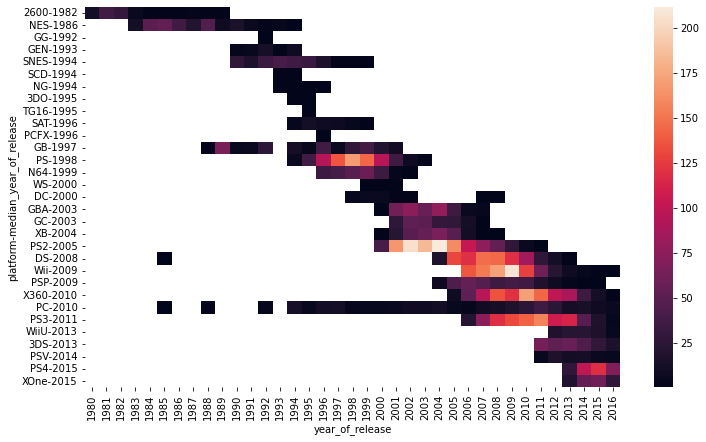

In [22]:
plt.figure(figsize = (12,7))
sns.heatmap(data.pivot_table(index = ['platform', 'median_year_of_release'], values = 'worldwide_sales', columns = 'year_of_release', aggfunc = 'sum').sort_values(by = 'median_year_of_release'))

plt.show()

На тепловой карте уже видны выбросы данных: например, есть игры на Nintendo DS, проданные в 1985 году, хотя платформа увидела свект только в 2004 году.

Также можно видеть, что концентрация платформ в последние годы растёт: в 1996 году игры продавались всего для восьми платформ, в 2013 - уже для одиннадцати. Видно также примерное время жизни каждой из платформ: в девяностые они рождались и умирали через 3-6 лет (исключение - легендарная SNES - Super Nintendo Entertainment System). В последние же годы платформы существуют дольше: нижние ступени лестницы становятся длиннее. Например, PS3 существует уже 10 лет.

И, разумеется, длиннным хвостом тянется особая игровая платформа - PC, существующая с незапамятных времён.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И здесь классно показал на графике как вели себя сами платформы. 
</div 

Теперь посмотрим на среднее время жизни платформы. Данные сохраним в переменную `platform_lifetime`.

In [23]:
# Исключим из анализа PC, так как очевидно, что это не обычная игровая платформа, и его время жизни гораздо больше остальных
platform_lifetime = data[data['platform'] != 'PC'].groupby('platform')\
.agg(first_game = ('year_of_release', 'min'), last_game = ('year_of_release', 'max'))

# Добавим столбец с разницей между последней и первой игрой
platform_lifetime['lifetime'] = platform_lifetime['last_game'] - platform_lifetime['first_game']

# Выведем среднее
print(f'Среднее время жизни платформы: {round(platform_lifetime["lifetime"].mean(), 2)} лет')

Среднее время жизни платформы: 6.83 лет


Будем, однако, помнить, что тепловая карта выше продемонстрировла, что время жизни платформы склонно увеличиваться в последние годы.

Теперь перейдём к определению самых популярных платформ в последние годы (помним, что `sales_platforms` хранит в себе данные с 2012 года).

In [24]:
# Определим самые популярные платформы
sales_platforms['worldwide_sales'].describe()

count     11.000000
mean     131.502727
std      112.116322
min       11.190000
25%       42.275000
50%       82.190000
75%      215.575000
max      314.140000
Name: worldwide_sales, dtype: float64

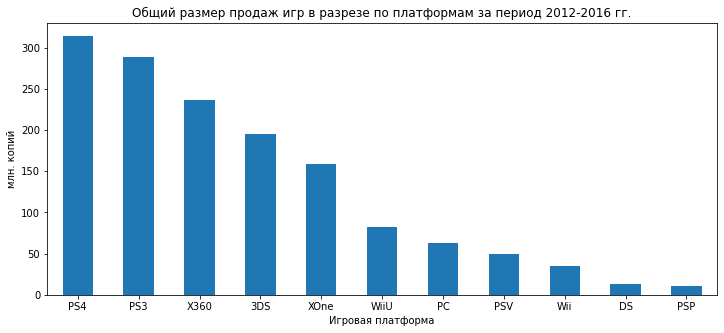

In [25]:
# Визуализируем полученные данные
sales_platforms.sort_values(by = 'worldwide_sales', ascending = False)\
.plot(y = 'worldwide_sales', kind = 'bar', figsize = (12, 5), xlabel = 'Игровая платформа', ylabel = 'млн. копий', legend = False)
plt.title('Общий размер продаж игр в разрезе по платформам за период 2012-2016 гг.')
plt.xticks(rotation=0)
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Вот и список лидеров получили. 
</div 

Я полагаю, что "популярной" платформу можно назвать, если она находится как минмум во втором квартиле по количеству проданных копий в последние годы.

Создадим список популярных платформ и сохраним его в переменную `modern_popular_platforms`, отфильтровав по столбцу `worldwide_sales`, чтобы в список попали только популярные платформы из 2-4 квартилей совокупности мировых продаж.

In [26]:
modern_popular_platforms = []

for plat in sales_platforms[sales_platforms['worldwide_sales'] > 43].index.unique():
    modern_popular_platforms.append(plat)

print('Вот список популярных в последние годы платформ:')    
print(modern_popular_platforms)

Вот список популярных в последние годы платформ:
['3DS', 'PC', 'PS3', 'PS4', 'PSV', 'WiiU', 'X360', 'XOne']


Посмотрим на продажи популярных в __последние годы__ платформ за __все__ годы наблюдений. Помним, что основной датасет `data` всё еще хранит информацию до 2012 года.

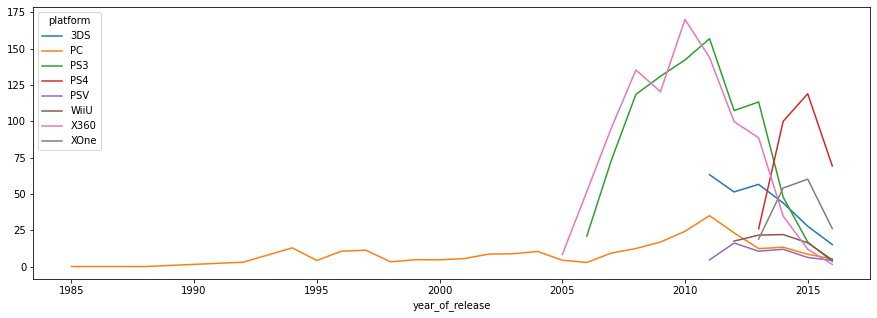

In [27]:
data[data['platform'].isin(modern_popular_platforms)]\
.pivot_table(index='year_of_release', columns = 'platform', values='worldwide_sales', aggfunc='sum')\
.plot(figsize = (15, 5))
plt.show()

Очевидно, что сейчас популярны платформы, возникшие относительно недавно. Из дорлогожителей можно выделить только __xbox 360__ и __PS3__. Ну и, разумеется, персональный компьютер.

Настало время обновить основной датасет, согласно нашим данным о переломе в 2012 году:

In [28]:
data = data.query('year_of_release > 2011')

<div class="alert alert-block alert-warning">
 
### Комментарий ревьюера
    
#### Совет
    
Для целей прогнозирования продаж на следующий год даже в традиционных бизнесах редко берут данные более чем за 2-3 года. А в такой динамично меняющейся индустрии, как компьютерные игры и вовсе не стоит брать слишком большой временной интервал - иначе обязательно захватишь уже отжившие тренды. Но и слишком короткий период тоже брать не стоит
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента <a class="tocSkip"></h3> 
    
Согласен! Я тоже так считаю, но идея этого графика была в том, чтобы посмотреть когда родились актуальные сейчас платформы. Однако ты прав, это не самая очевидная идея, и задачам проекта в целом она не отвечает.
    
</div>

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Супер. Учти на будущее:) 
</div 

Присмотримся внимательнее к продажам в разрезе популярных платформ, помня, что данные за 2016 могут быть не полными. Я не буду удалять этот год из датасета, но на график выводить не буду, чтобы он не смущал наблюдателя неплоными данными:

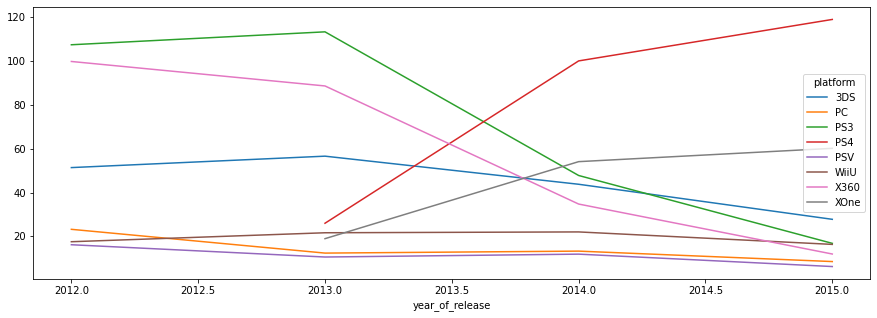

In [29]:
data[data['platform'].isin(modern_popular_platforms) & (data['year_of_release'] < 2016)]\
.pivot_table(index='year_of_release', columns = 'platform', values='worldwide_sales', aggfunc='sum')\
.plot(figsize = (15, 5))
plt.show()

Рост показывают только две платформы: XBox One и PS4. Это интересно, учитывая, что в списке "популярных платформ" XBox One находится лишь на пятом месте по количеству проданных копий игр за последние годы. Похоже, что к этой молодой платформе стоит присмотреться повнимательнее.

Построим график разброса «ящик с усами» по глобальным продажам игр в разбивке по платформам. Для этого я использую цикл:

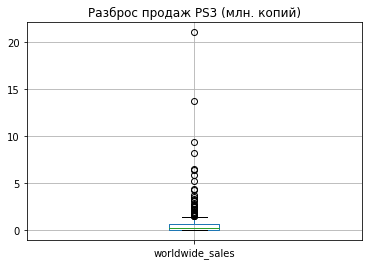

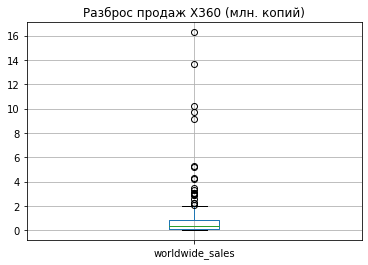

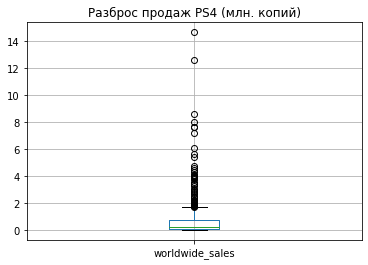

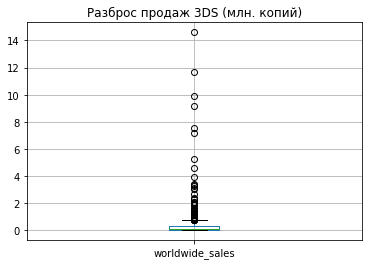

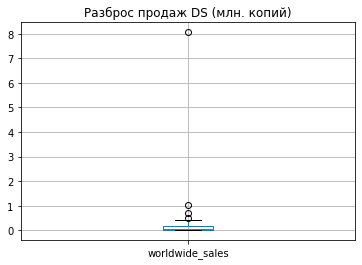

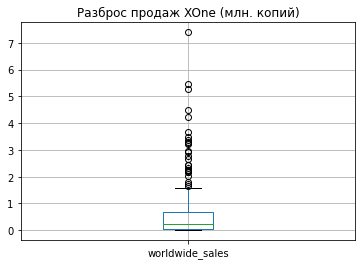

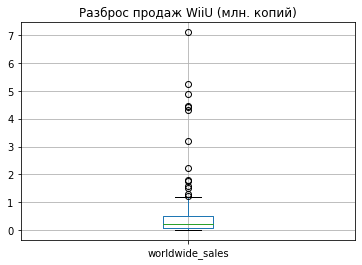

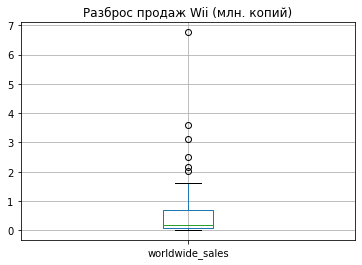

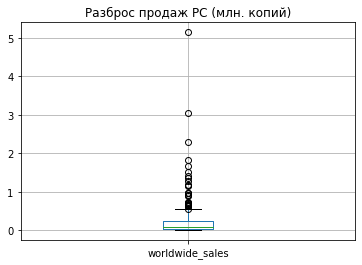

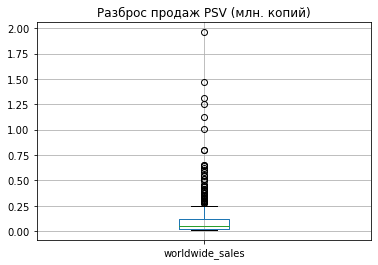

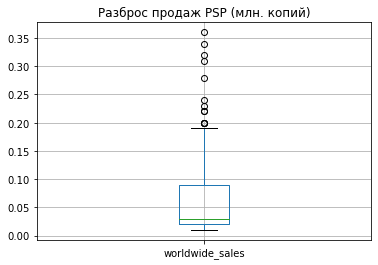

In [30]:
for plat in data['platform'].unique():
    data[data['platform'] == plat].boxplot('worldwide_sales')
    plt.title(f'Разброс продаж {plat} (млн. копий)')
    plt.show()

Графики показывают серьезный разброс данных по всем платформам, кроме PSP. При этом я бы не спешил называть это аномалиями или ошибками в данных. Судя по всему, для каждой платформы существуют "хиты" или топовые игры, которые очень сильно выбиваются по количеству проданных копий. 

Проверим, являются ли самые дальние точки артефаками в данных или же это настоящие игры и настоящие цифры:

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
К сожалению, на этом графике видны только выбросы, и совсем не видны медиана и 75% квантиль. Для более обоснованных выводов нужно сделать дополнительный график, где будет отображена только нижняя часть boxplot-ов. Этого можно добиться, например, задав параметр ylim.
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента <a class="tocSkip"></h3> 
    
Понял! Попробуем ниже:
    
</div>
    
"Правило трех сигм" гласит, что 99% выборки, распределенной нормально, попадают в +- три стандартных отклонения от среднего совокупности. У меня нет уверенности, что мировые продажи распределены нормально, и тем не менее я попробую поставить границу оси `y` от среднего и одного стандартного отклонения от него. Так мы сможем лучше наблюдать сам "ящик", а не только выбросы.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
А вот теперь отлично у тебя получилось. 
</div 

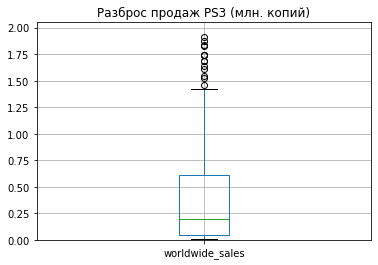

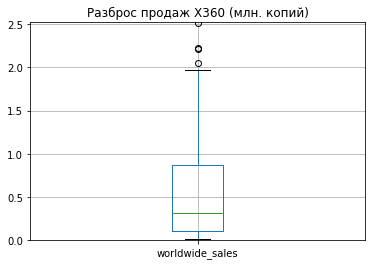

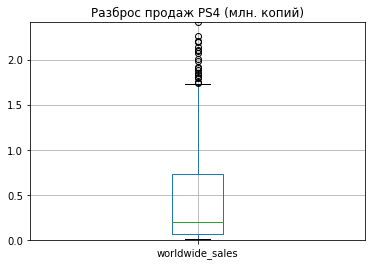

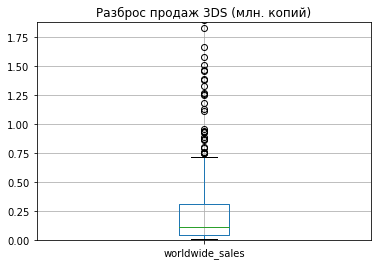

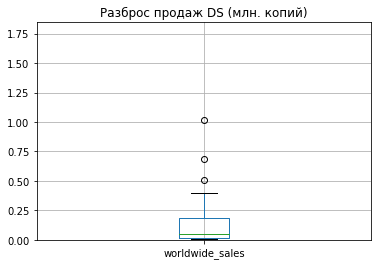

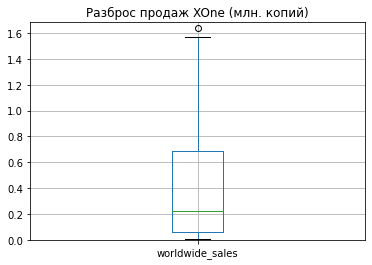

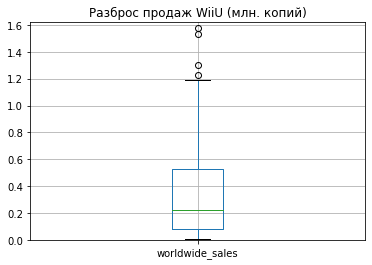

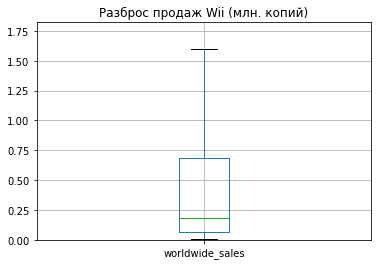

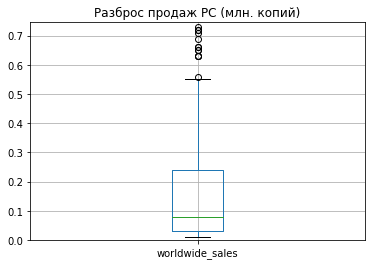

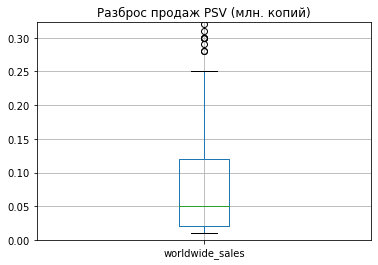

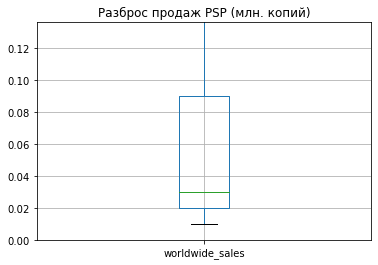

In [31]:
for plat in data['platform'].unique():
    data[data['platform'] == plat].boxplot('worldwide_sales')
    plt.title(f'Разброс продаж {plat} (млн. копий)')
    # Задаем границы оси: от нуля до "среднее + одно стандартное отклонение"
    plt.ylim(0, (data[data['platform'] == plat]['worldwide_sales'].mean() + data[data['platform'] == plat]['worldwide_sales'].std()))
    plt.show()

In [32]:
# Нашел на stackoverflow метод Series_to_string, чтобы строка выглядела лучше
for plat in modern_popular_platforms:
    print('Самая популярная игра на платформе', plat)
    print(pd.Series.to_string(data[data["platform"] == plat].query("worldwide_sales == worldwide_sales.max()")['name'], index = False))
    print('')

Самая популярная игра на платформе 3DS
Pokemon X/Pokemon Y

Самая популярная игра на платформе PC
Diablo III

Самая популярная игра на платформе PS3
Grand Theft Auto V

Самая популярная игра на платформе PS4
Call of Duty: Black Ops 3

Самая популярная игра на платформе PSV
Minecraft

Самая популярная игра на платформе WiiU
Mario Kart 8

Самая популярная игра на платформе X360
Grand Theft Auto V

Самая популярная игра на платформе XOne
Call of Duty: Black Ops 3



Как и ожидалось, это очень популярные игры, о которых слышал каждый, кто даже относительно далёк от игровой индустрии: GTA, Diablo, Call of Duty, Pokemon и Minecraft. Будчем считать, что в данных аномалий нет.

Теперь посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим матрицу диаграмм рассеяния и посчитаем корреляцию между оценками и продажами. Например, возьмём XBox One, хотя бы потому, что эта консоль есть у меня:

,critic_score,user_score,worldwide_sales
critic_score,1.000000,0.472462,0.416998
user_score,0.472462,1.000000,-0.068925
worldwide_sales,0.416998,-0.068925,1.000000


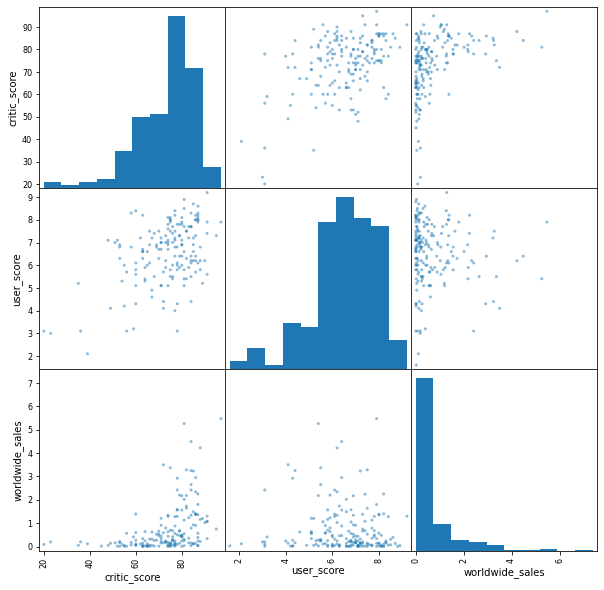

In [33]:
# Считаем корреляцию между продажами и оценками
display(data[data['platform'] == 'XOne'][['critic_score', 'user_score', 'worldwide_sales']].corr())

# Строим диаграммы рассеяния
pd.plotting.scatter_matrix(data[data['platform'] == 'XOne'][['critic_score', 'user_score', 'worldwide_sales']]\
, figsize = (10, 10))
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Классный метод используешь для показа зависимости на графике. 
</div 

<div class="alert alert-block alert-info">
<h3> Комментарий студента <a class="tocSkip"></h3> 
    
Обожаю матрицу диаграмм рассеяния :)
    
</div>

Признаться, я удивлён. Если оценки от критиков и ползователей ещё относительно коррелируют друг с другом, хотя и не очень сильно, то на продажи они как будто бы вовсе не влияют. Разве что у игры с высокими оценками от критиков, шанс быть коммерчески успешной несколько выше.

Вдруг XBox - это не обычная платформа? На всякий случай валидирую свои выводы с помощью PlayStation:

,critic_score,user_score,worldwide_sales
critic_score,1.000000,0.557654,0.406568
user_score,0.557654,1.000000,-0.031957
worldwide_sales,0.406568,-0.031957,1.000000


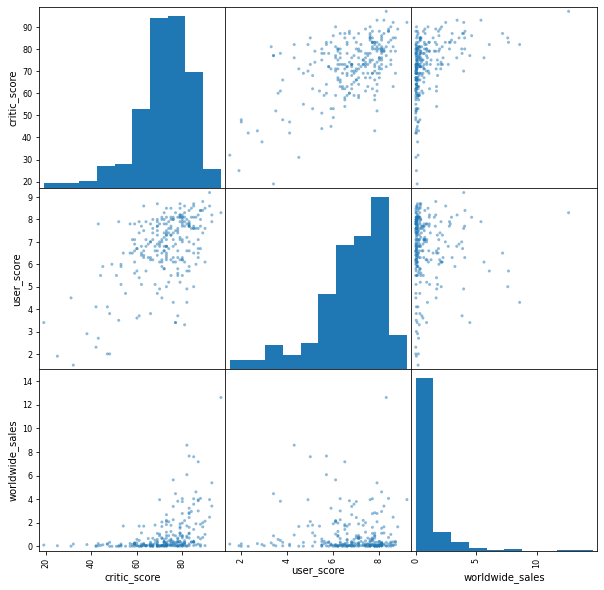

In [34]:
# Считаем корреляцию между продажами и оценками
display(data[data['platform'] == 'PS4'][['critic_score', 'user_score', 'worldwide_sales']].corr())

# Строим диаграммы рассеяния
pd.plotting.scatter_matrix(data[data['platform'] == 'PS4'][['critic_score', 'user_score', 'worldwide_sales']]\
, figsize = (10, 10))
plt.show()

Всё по-прежнему. У оценок пользователей и успешностью игры есть даже лёгкая отрицательная корреляция.

Чтобы окончательно рассеять всяческие сомения, построим сводную таблицу подобных корреляций для всех популярных платформ. Я буду использовать цикл и три списка: название платформы, корреляция критики-продажи и корреляция пользователи-продажи.

Цикл наполнит эти списки данными, а затем я объединю их в таблицу, чтобы вызуализировать:

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Выводы на основе данных с нескольких платформ выглядят убедительнее. 
</div 

,platform,critics_sales_corr,users_sales_corr
0,3DS,0.320803,0.197583
1,PC,0.237243,-0.121867
2,PS3,0.331497,-0.005144
3,PS4,0.406568,-0.031957
4,PSV,0.094488,-0.004339
5,WiiU,0.348380,0.400219
6,X360,0.360573,0.006164
7,XOne,0.416998,-0.068925


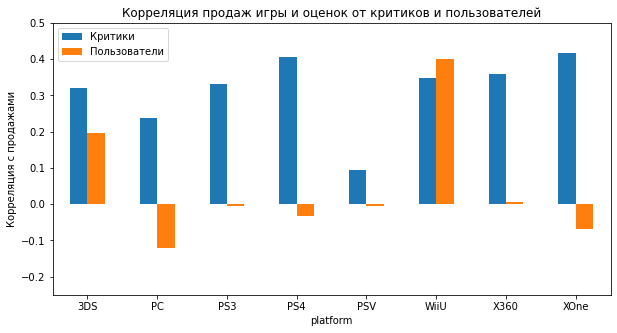

In [35]:
plat_list = []
user_score_corr_list = []
critic_score_corr_list = []

for plat in modern_popular_platforms:
    plat_list.append(plat)
    user_score_corr_list.append(data[data['platform'] == plat]['user_score']\
                                .corr(data[data['platform'] == plat]['worldwide_sales']))
    critic_score_corr_list.append(data[data['platform'] == plat]['critic_score']\
                                  .corr(data[data['platform'] == plat]['worldwide_sales']))

# Сохраним итоговые данные в датасет "super_corr"
super_corr = pd.DataFrame({'platform' : plat_list, 'critics_sales_corr' : critic_score_corr_list, 'users_sales_corr' : user_score_corr_list})

# Взглянем на таблицу
display(super_corr)

# Визуализируем с помощью столбчатой диаграммы
super_corr.plot(kind = 'bar', x = 'platform', figsize = (10, 5), width = .5, ylim = (-.25, .5), ylabel = 'Корреляция с продажами')
plt.title('Корреляция продаж игры и оценок от критиков и пользователей')
plt.legend(('Критики', 'Пользователи'))
plt.xticks(rotation = 0)
plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И здесь мне нравится твой подход к показу разницы по корреляции между платформ. 
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента <a class="tocSkip"></h3> 
    
Кайф :)
    
</div>

<a id='3'></a>
Стало окончательно ясно, что при планировании продаж, можно вообще не смотреть на отзывы пользователей. Критики обладают чуть большим весом в принятии подобного рода решений.

### Часть 3. Составление портрета пользователя каждого региона

Теперь взглянем на популярность разных жанров в разрезе регионов продаж. Снова использую тепловую карту и сводную таблицу `sales_genres`, заготовленную ранее.
<a id='4'></a>

,eu_sales,jp_sales,na_sales,other_sales,worldwide_sales
genre,,,,,
Action,159.34,52.80,177.84,51.14,441.12
Shooter,113.47,9.23,144.77,37.26,304.73
Role-Playing,48.53,65.44,64.00,14.83,192.80
Sports,69.09,8.01,81.53,22.44,181.07
Misc,26.32,12.86,38.19,7.67,85.04
Platform,21.41,8.63,25.38,5.58,61.00
Racing,27.29,2.50,17.22,6.49,53.50
Fighting,10.79,9.44,19.79,4.47,44.49
Simulation,14.55,10.41,7.97,2.19,35.12


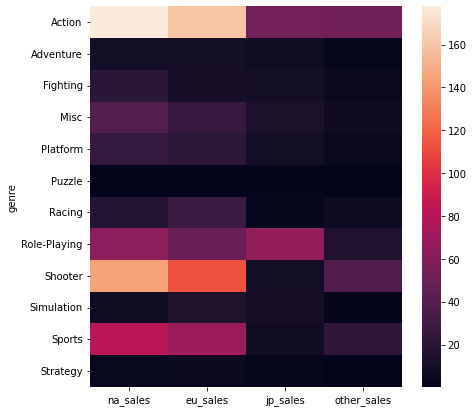

In [36]:
display(sales_genres.sort_values(by = 'worldwide_sales', ascending = False))

# Визаулизируем
plt.figure(figsize = (7, 7))
sns.heatmap(sales_genres[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']])
plt.show()

Сразу можно сказать, что пользователи из США и Европы демонстрируют схожее поведение: Action и Shooter самые популярные жанры в этих регионах. Спортивные игры тоже в чести. Прочие регионы следуют за первыми двумя.

А вот Япония стоит особняком: там не так сильно любят шутеры, как RPG.

Примерно то же самое можно визуализировать с помощью другого вида графика: pie chart.

<div class="alert alert-block alert-danger">
 
### Комментарий ревьюера
    
#### Ошибка
    
Общие продажи - плохая метрика для поиска наиболее прибыльного жанра. За высокими показателями общих продаж может скрываться множество мелких игр с низкими продажами. Или 2-3 звезды и куча провалов. Лучше найти жанр, где игры стабильно приносят высокий доход - для этого стоит рассмотреть средние или медианные продажи.
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента <a class="tocSkip"></h3> 
    
Понял! Попробуем ниже:
    
</div>

Средние продажи по жанру:


,eu_sales,jp_sales,na_sales,other_sales,worldwide_sales
genre,,,,,
Shooter,0.482851,0.039277,0.616043,0.158553,1.296723
Platform,0.251882,0.101529,0.298588,0.065647,0.717647
Sports,0.257799,0.029888,0.304216,0.083731,0.675634
Role-Playing,0.131162,0.176865,0.172973,0.040081,0.521081
Racing,0.237304,0.021739,0.149739,0.056435,0.465217
Misc,0.137083,0.066979,0.198906,0.039948,0.442917
Simulation,0.181875,0.130125,0.099625,0.027375,0.439000
Action,0.154549,0.051212,0.172493,0.049602,0.427856
Fighting,0.098991,0.086606,0.181560,0.041009,0.408165


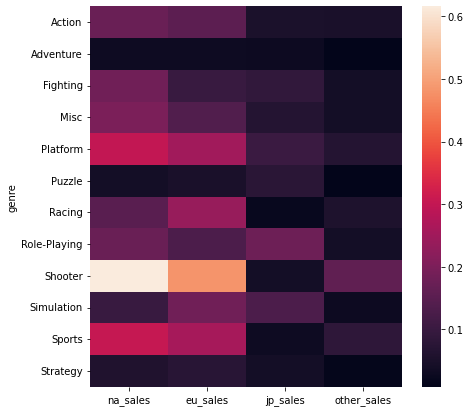

Медианные продажи по жанру:


,eu_sales,jp_sales,na_sales,other_sales,worldwide_sales
genre,,,,,
Shooter,0.170,0.00,0.20,0.05,0.440
Sports,0.050,0.00,0.08,0.02,0.240
Platform,0.080,0.00,0.09,0.02,0.210
Role-Playing,0.010,0.06,0.02,0.01,0.140
Racing,0.090,0.00,0.04,0.02,0.140
Fighting,0.020,0.03,0.05,0.01,0.130
Action,0.020,0.01,0.02,0.01,0.120
Misc,0.015,0.02,0.01,0.00,0.120
Simulation,0.030,0.00,0.00,0.01,0.120


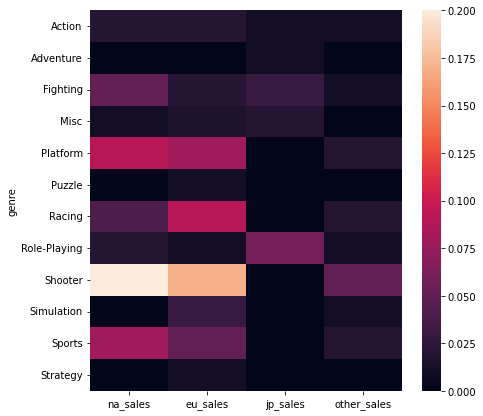

In [37]:
# Составим сводные таблицы со средними и медианными продажами по жанру
genres_table_mean = data.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'worldwide_sales'], aggfunc = 'mean')
genres_table_median = data.pivot_table(index = 'genre', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'worldwide_sales'], aggfunc = 'median')

# Визаулизируем
print('Средние продажи по жанру:')
display(genres_table_mean.sort_values(by = 'worldwide_sales', ascending = False))
plt.figure(figsize = (7, 7))
sns.heatmap(genres_table_mean[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']])
plt.show()
print('Медианные продажи по жанру:')
display(genres_table_median.sort_values(by = 'worldwide_sales', ascending = False))
plt.figure(figsize = (7, 7))
sns.heatmap(genres_table_median[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']])
plt.show()

Платформеры и спорт вырываются вперёд!

И это при том, что в общих продажах однозначно лидировал экшн. Это может говорить о том, что топовые игры, которые значительно превышают другие по количеству продаж - именно экшены.

Европа и США при этом по-прежнему предпочитают шутеры, а Япония - RPG.

<div class="alert alert-block alert-success">
 
# Комментарий ревьюера ver.2
    
#### Успех
    
Вот здесь ты тоже поступил достаточно оригинально и верно определил самый прибыльный жанр.
</div 

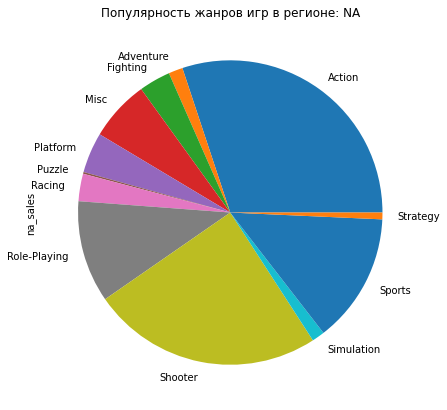

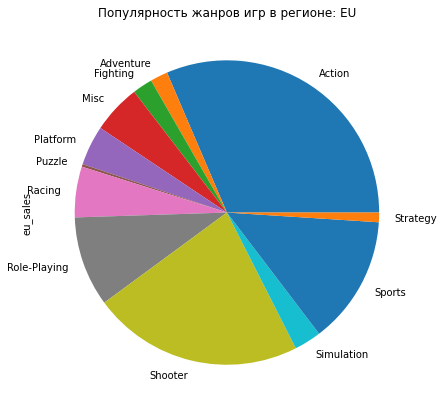

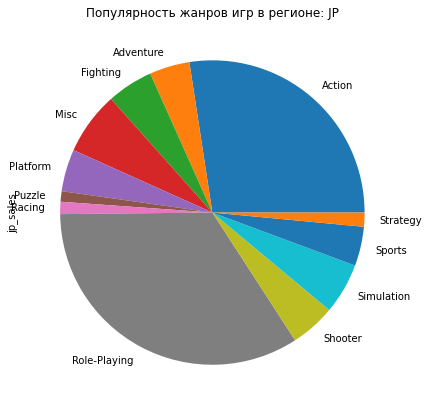

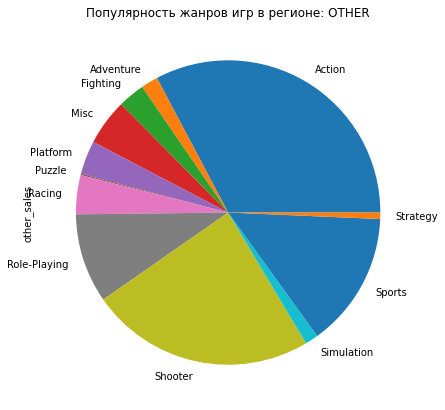

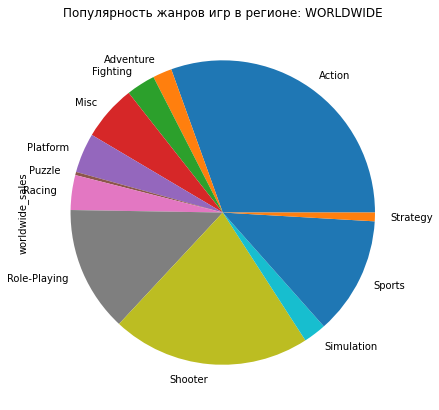

In [38]:
# рассмотрим популярность жанров в разных странах
region_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'worldwide_sales']

for i in region_list:
    sales_genres.plot(kind = 'pie', y = i, figsize = (7, 7), legend = False, )
    plt.title(f'Популярность жанров игр в регионе: {i.replace("_sales", "").upper()}', loc='center')
    plt.show()

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Супер. По графикам видно, что каждый регион имеет свою специфику. 
</div 

По той же схеме рассмотрим популярность разных платформ в разных регионах с помощью сводной `sales_platforms`:

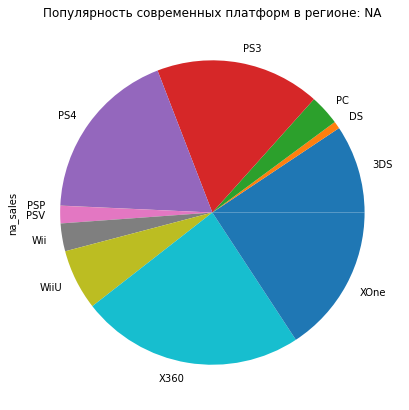

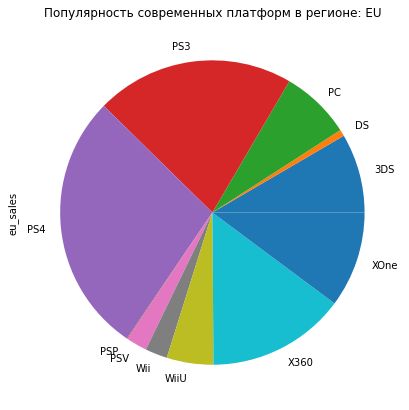

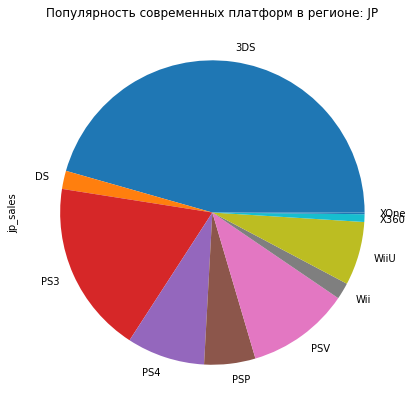

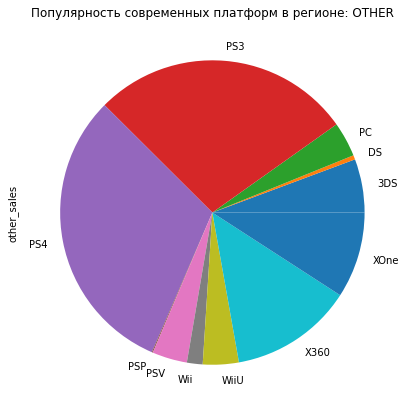

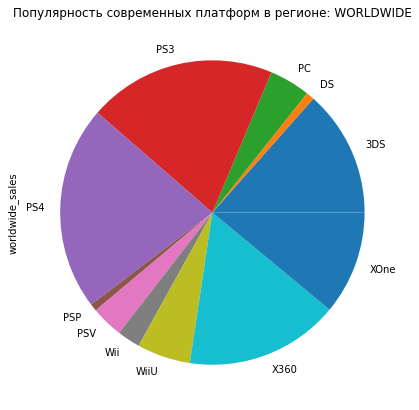

In [39]:
# рассмотрим популярность платформ в разных странах
region_list = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales', 'worldwide_sales']

for i in region_list:
    sales_platforms.plot(kind = 'pie', y = i, figsize = (7, 7), legend = False, )
    plt.title(f'Популярность современных платформ в регионе: {i.replace("_sales", "").upper()}', loc='center')
    plt.show()

Ничего необычного: в Японии популярны японские консоли, а в других частях света - американские. Хотя японская PlayStation составляет серьезную конкуренцию остальным платформам и на других рынках.

Настало время посмотреть на влияние возрастного рейтинга на продажи в разных регионах мира. Для этого я использую столбчатую диаграмму:

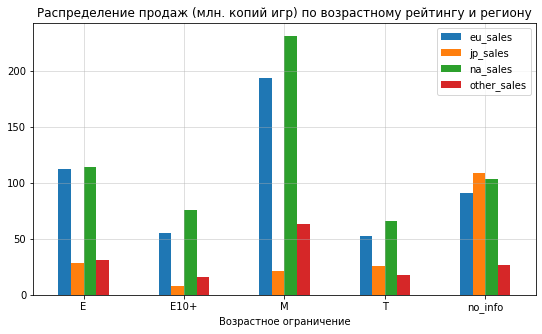

In [40]:
data.pivot_table(index = 'rating', values = ['na_sales', 'eu_sales', 'jp_sales', 'other_sales'], aggfunc = 'sum')\
.plot(kind = 'bar', figsize = (9, 5), grid = True, xlabel = 'Возрастное ограничение')
plt.title('Распределение продаж (млн. копий игр) по возрастному рейтингу и региону')
plt.xticks(rotation=0)
plt.grid(alpha = .5)
plt.show()

Сразу видно, что в Европе и США игры - это в основном развлечение для взрослых.

Япония и тут стоит особняком - большая часть проданных игр имеют рейтинг "для всех". Однако всерьез полагаться на эти данные не стоит - очень много пропущенных значений, которые могут повлиять на дальнейшие решения.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Теперь мы точно знаем, что стоит учитывать особенность в каждого региона. 
</div 

Коррелируют ли продажи игр в разных регионах? У меня есть ощущение, что я уже знаю ответ на этот вопрос. Мы уже увидели множество данных, говорящих о том, что все пользователи ведут себя схожим обрахом, за исключением граждан Японии. И всё же проверим:

In [41]:
data[['na_sales', 'eu_sales', 'jp_sales', 'other_sales']].corr()

,na_sales,eu_sales,jp_sales,other_sales
na_sales,1.000000,0.767484,0.271010,0.792277
eu_sales,0.767484,1.000000,0.265134,0.936906
jp_sales,0.271010,0.265134,1.000000,0.203078
other_sales,0.792277,0.936906,0.203078,1.000000


Как и ожидалось, игра, которая хорошо продаётся в Европе, скорее всего, будет хорошо продаваться и в США (или наоборот), а в Японии - совсем не обязательно.

Настало время проверки гипотез. Для их проверки я буду использовать данные `data_raw`, чтобы выборка была достаточно большой, а не урезанной по году.

Сформулируем нулевую гипотезу H<sub>0</sub>:
Средние пользовательские рейтинги платформ Xbox One и PC одинаковые, иными словами

_Cреднее генеральной совокупсноти "пользовательский рейтнг платформы XBox One" = среднее генеральной совокупсноти "пользовательский рейтнг платформы PC"_

Сформулируем альтернативную гипотезу H<sub>1</sub>:

_Cреднее генеральной совокупсноти "пользовательский рейтнг платформы XBox One" != среднее генеральной совокупсноти "пользовательский рейтнг платформы PC"_

Перед проведением статистического теста сравним дисперсии двух совокупностей.

<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Гипотезы сформулированы. Супер. 
</div 

In [42]:
data_raw['User_Score'] = data_raw['User_Score'].replace('tbd', np.NaN)
data_raw['User_Score'] = data_raw['User_Score'].astype('float')

print(data_raw[data_raw['Platform'] == 'PC']['User_Score'].std() ** 2)
print(data_raw[data_raw['Platform'] == 'XOne']['User_Score'].std() ** 2)

2.3407871413372
1.90699684293607


Дисперсии достаточно сильно отличаются, поэтому параметр equal_var я задам как False:

In [43]:
# Определим границу статистической значимости как 5%
alpha = .05

# Статистические тесты плохо работают с пропусками, удалим их
pc_array = np.array(data_raw[data_raw['Platform'] == 'PC']['User_Score'].dropna())
xone_array = np.array(data_raw[data_raw['Platform'] == 'XOne']['User_Score'].dropna())

result = st.ttest_ind(pc_array, xone_array, equal_var = False)
print(f'{round(result.pvalue, 4):.2%}')

if result.pvalue > alpha:
    print('Не отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

0.00%
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Метод проверки определен верно с выводом согласен. 
</div 

Сформулируем вторую нулевую гипотезу H<sub>0</sub>:
Средние пользовательские рейтинги жанров Action и Sports разные, иными словами

_Cреднее генеральной совокупсноти "пользовательский рейтнг жанра Action" != среднее генеральной совокупсноти "пользовательский рейтнг жанра Sports"_

Сформулируем альтернативную гипотезу H<sub>1</sub>:

_Cреднее генеральной совокупсноти "пользовательский рейтнг жанра Action" = среднее генеральной совокупсноти "пользовательский рейтнг жанра Sports"_

In [44]:
print(data_raw[data_raw['Genre'] == 'Action']['User_Score'].std() ** 2)
print(data_raw[data_raw['Genre'] == 'Sports']['User_Score'].std() ** 2)

2.0317468980331914
2.596514718973007


Дисперсии близки, поэтому параметр equal_var я задам как True:

In [45]:
# Граница статистической значимости остаётся прежней

action_array = np.array(data_raw[data_raw['Genre'] == 'Sports']['User_Score'].dropna())
sports_array = np.array(data_raw[data_raw['Genre'] == 'Action']['User_Score'].dropna())

result = st.ttest_ind(action_array, sports_array, equal_var = True)
print(f'{round(result.pvalue, 4):.2%}')

if result.pvalue < alpha:
    print('Не отвергаем нулевую гипотезу')
else:
    print('Отвергаем нулевую гипотезу')

10.41%
Отвергаем нулевую гипотезу


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
И в этом месте отлично справился с Гипотезами. Здорово. 
</div>
<div class="alert alert-block alert-info">
<h3> Комментарий студента <a class="tocSkip"></h3> 
    
Спасибо! Понять эту тему было не просто.
    
</div>

### Часть 4. Итоговый вывод

В ходе исследования я изучил датасет с инфлрмацией о продажах и оценках компьютерных игр за период с 1980-х годов до 2016 года.

Во время [исследовательского анализа](#1) данных удалось получить следующие показатели:
- Среднее время жизни одной игровой платформы - около семи лет.
- Обосняком стоит пталформа "персональный компьютер", чье время жизни сильно длиннее и, судя по всему, эта платформа в ближайшие годы не уйдет с рынка.
- Время жизни платформ постепенно увеличивается. Современные платформы живут дольше.

Также нужно отметить, что далеко не все данные были признаны релевантными. [Здесь](#2) я показываю, что основывать принятие решений на данных до 2012 не имеет смысла: рынок изменился. Поэтому в ходе дальнейшего анализа были взяты данные за 2012 и последующие годы.

Несмотря на то, что за последние годы наибольшее количество игр было продано для платформ PlayStation4, PlayStation3 и XBox 360, в последнее время рост продаж демонстрируют только __PlayStation4__ и __XBox One__. Именно на эти две платформы я бы рекомендовал делать ставку на 2017 год.

Продажи демонстрируют слабую корреляцию с отзывами критиков и вообще никакой корреляции с оценками рядовых пользователей. Таким образом, при планировании рекламной кампании на 2017 стоит обратить внимание на оценки критиков, но целиком полагаться на них не стоит. Оценки геймеров можно не брать в расчёт вовсе. Подробный анализ я провожу [тут](#3).

Также я составил [потрет пользователя](#4) в каждом из регионов. В целом пользователей можно разделить на две неравноценные группы: геймер из Японии и все остальные. Поэтому проще всего ориентироваться на рынок США и Европы. В этих регионах наиболее популярны __экшены, шутеры и спортивные игры__. Также свою рекламную компанию в этих регионах необходимо ориентировать на __взрослого__ потребителя, способного приобрести игру с возрастным ограничением M.

Также в ходе исследования я отверг две выдвинутые гипотезы:
- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые
- Средние пользовательские рейтинги жанров Action и Sports разные


<div class="alert alert-block alert-success">
 
### Комментарий ревьюера
    
#### Успех
    
Тот момент, когда Итоговый вывод стал отличным завершением проекта. Тут у тебя собрано все, что ты обнаружил в ходе исследования. Теперь мы точно сможем сделать вывод на 2017. 
</div 

<div class="alert alert-block alert-info">

## Итоговый комментарии от ревьюера:
    
#### Успех

Поздравляю тебя с выполнением твоего первого Сборного проекта. Мне показалось, что работа выполненна прекрасно и ты здорово постарался. Понравилось, что ты хорошо владеешь отличными навыками Предобработки данных и проверки Гипотез. А еще особенно ценно, что ты везде пишешь аргументацию своим действиям. Так, если проект попадет в руки незнакомому человеку, он сможет разобраться. Это тебе очень пригодится в будущем.

В проекте осталось пару небольших замечений:
    
* Подправить графики "Ящик с усами".   
* Требуется определить самый прибыльный жанр по медианному или среднему значению.
       
Еще я оставил рекомендации. Очень надеюсь, что ты учтешь их в этом и последующих проектах.
    
    
Жду проект после доработки. Уверен, ты справишься.
</div>

<div class="alert alert-block alert-info">
<h3> Комментарий студента <a class="tocSkip"></h3> 
    
Еще раз спасибо, Вячеслав!
    
</div>